В самом начале мы говорили о том, что модель в вакууме никому не нужна — она приносит пользу только если встроена в какой-то бизнес-процесс. От того, как выглядит этот процесс, зависит и то, как нужно встраивать туда модель. Давайте разберём самые частые примеры. 

Принципиально модели можно разделить на два типа: офлайн и онлайн.

Определения: онлайн- и офлайн-модель

Онлайн-модель, или модель, доступная в реальном времени, подразумевает, что существует некий постоянный процесс с этой моделью. К этому процессу можно делать запросы, чтобы получить предсказание модели. Эти запросы могут делать люди, а могут делать и другие процессы. Важно, что в такой схеме предсказание можно получить сразу, как только инициатору запроса это требуется.

Офлайн-схема работает иначе: модель не доступна для запросов, а наоборот, запускается один раз на всех доступных на текущий момент данных и может делать это с некоторой периодичностью. 

Давайте разберем несколько примеров в порядке увеличения автоматизации.

0 СОРЕВНОВАНИЯ НА KAGGLE

Самый простой пример офлайн-модели, которая не требует никакой автоматизации — соревнования по анализу данных. Действительно, оставляя за скобками само построение модели, когда она уже есть у вас на руках, вы один раз применяете её ко всем тестовым данным и заливаете очередной сабмит с результатами. Тут нечего автоматизировать, потому что модель применяется только один раз.

1 ОТЧЁТ

Вы проводите некоторое исследование на основе данных и обучаете предсказательную модель для отчета. Тут тоже, скорее всего, не нужна никакая автоматизация, потому что ценность представляют не сами предсказания модели, а их интерпретация и в целом весь отчёт.

При этом не факт, что модель будет применена единожды — вас могут позже попросить сделать расчёт на новых данных, возможно, даже будут просить делать его каждый день — и это уже ближе к следующему примеру.

2 РАСЧЁТЫ ПО РАСПИСАНИЮ

Такой формат уже гораздо ближе к реальным задачам.

Обычно это выглядит так: есть настроенный процесс, который загружает новые данные за прошедший интервал времени, и вам нужно применить модель к этим данным. 

Скорее всего, в этом процессе человек уже не участвует, а значит и результаты должны не просто посчитаться, а куда-то записаться, чтобы быть доступными для следующего участника процесса.

Разберем два примера — простой (✮) и сложный (✮✮). Начнём с простого. 

✮ Уровень 1. Рекомендации для небольшого онлайн-магазина

Почему используем именно офлайн-схему? Причин может быть много, например, так дешевле и проще. Оставим это за скобками, но стоит отметить, что даже во многих крупных компаниях пока что делают именно так.

Итак, простой кейс. Вы построили рекомендательную систему для вашего небольшого магазина. Для её работы вам нужны данные о продажах, которые лежат в вашей небольшой, как и магазин, базе данных. В таком случае, вам достаточно написать скрипт, который:

1. Будет выгружать данные из базы, например в файл .csv.

2. Читать этот файл.

3. Загружать вашу модель и прогонять её на обновленных данных.

4. Результаты записывать обратно в базу в соответствующие таблицы. 

Итак, нам необходимо запускать скрипт каждый день в определенное время. Пусть это будет 12 часов вечера, когда активности уже нет.

Для решения этой задачи существуют так называемые шедулеры — процессы, которые умеют по расписанию запускать другие процессы, например наш скрипт. Для базовой версии нам подойдет самый простой и популярный. Он называется cron и встроен во все UNIX-системы (в том числе MacOS). 

❗ Надеемся, что вам никогда не придется столкнуться с продакшеном на другой ОС, всё-таки стандарт индустрии — UNIX. Но если это произошло, не всё потеряно: есть свои планировщики и в Windows, либо можно отдельно установить cron, используя cygwin.

Cron устроен очень просто. Вам нужно просто добавить строчку с расписанием вашей задачи в специальный файл. Сделать это можно, набрав команду:

crontab -e

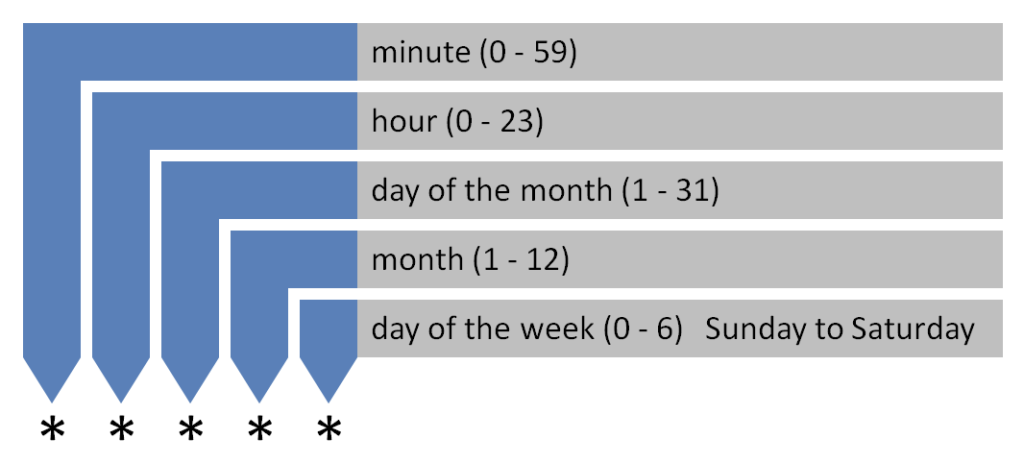

Синтаксис записи довольно простой и состоит из расписания и команды. Команда — это обычная bash-команда, а расписание — это пять чисел или символов. По порядку они означают минуты, часы, дни месяца, месяц и день недели, когда нужно выполнить задание. Можно указать число из нужного диапазона или * для любого значения. 

Например, вот такая запись:

10 0 * * * echo hi >> file.txt

будет дописывать hi в файл в 0 часов 10 минут любого дня любого месяца в любой день недели, то есть по сути ежедневно. 

☕ Не беспокойтесь, всё это запоминать необязательно. Перед тем, как это написать, авторам самим пришлось погуглить.

Подробнее прочитать про Cron и более продвинутые возможности синтаксиса можно на Википедии.

Например, 0 4 * * 1-4 python /path/to/script.py

✯✯ Уровень 2. Большой магазин

Теперь представим, что магазин у вас большой, и такой наивный подход уже не сработает. Данные у вас лежат в распределенной файловой системе на кластере, обрабатывать их тоже нужно, используя распределенные инструменты. В таком случае стоит использовать более сложные шедулеры, например Airflow, который позволяет запускать несколько задач и задавать зависимости между ними. Например, что запуск модели должен произойти только после успешной предобработки данных, а предобработка запускается только после того, как загрузились сырые данные. Также Airflow умеет мониторить задачи, удобно показывает логи и много других мелочей. 

Также бывают ситуации, когда модель не работает сама по себе, а встраивается в существующий фреймворк для параллельной обработки данных. В таком случае мы будем использовать Spark. 

3 ОНЛАЙН

Теперь перейдем к онлайну, и вы увидите, что существует принципиальная разница между двумя моделями.

Для примера возьмем условного Telegram-бота, в который можно прислать фото. Его наша модель обработает и выдаст ответ: скажем, изображен ли на фото хот-дог или нет. В этом случае мы не можем запускать обработку раз в сутки, потому что пользователь ожидает увидеть ответ сразу. Но в простом случае и нам не нужно иметь дел с базами и прочим — мы просто поднимаем сервис, в который backend бота может кинуть картинку, а он прогонит модель и вернет бэкенду результат.

4 МОНИТОРИНГ РАБОТЫ МОДЕЛИ

В более сложном случае нам недостаточно просто залить модель на сервис и забыть о ней. Нужно настроить мониторинг ошибок сервиса, уметь с минимальным даунтаймом обновлять модель, писать логи запросов и ответов и множество других мелочей. Тому, как правильно это делать, и будут посвящены следующие главы.